In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [2]:
# reading data into dataframe
telco= pd.read_csv("C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 20 (Clustering & PCA-FA)/1. Segmentation - Telecom - Class files/telco_csv.csv")

In [3]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [20]:
#Detailed profiling using pandas profiling

# pandas_profiling.ProfileReport(telco)

In [21]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat']
[]


In [45]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [23]:
# outliers treatment

telco_num = telco_num.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [26]:
telco_num.isnull().any().sum()

0

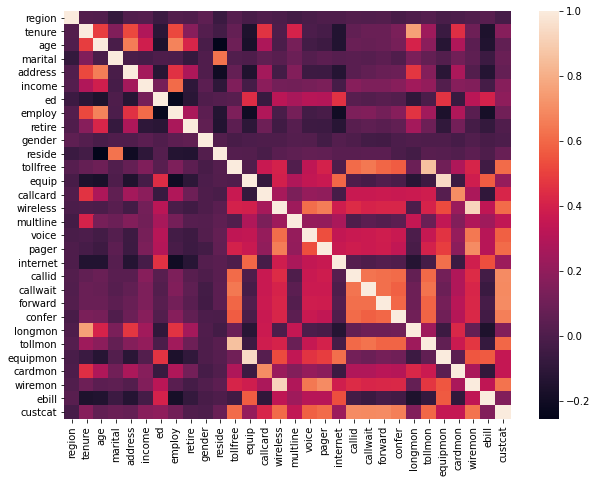

In [28]:
# checking corelation
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco_num.corr())

In [29]:
telco_num.corr().to_csv('C:/Users/tejan/Desktop//corr.csv')

In [33]:
telco_num.columns

Index(['tenure', 'age', 'income', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill'],
      dtype='object')

In [34]:
telco_num.head(2)

,tenure,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,...,callid,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill
0,13,44.0,64.0,2,0,0,1,0,0,0,...,0,0,1,0,3.7,0.00,0.0,7.50,0.0,0
1,11,33.0,136.0,6,1,0,1,1,0,1,...,1,1,1,1,4.4,20.75,0.0,15.25,35.7,0


In [32]:
telco_num.drop(['marital','region','custcat'], axis=1, inplace=True)
telco_num.drop(['address','employ', 'retire', 'gender', 'ed'], axis=1, inplace=True)


In [35]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)

In [37]:
pd.DataFrame(telco_scaled).head(1)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.055125,0.189446,-0.126231,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001


In [39]:
pd.DataFrame(telco_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,-1.512124e-16,1.0005,-1.617209,-0.867764,-0.071478,0.865328,1.708454
1,1000.0,3.602674e-17,1.0005,-1.741293,-0.775924,-0.132344,0.752578,2.281884
2,1000.0,4.113376e-17,1.0005,-0.810033,-0.577713,-0.345522,0.118860,4.988164
3,1000.0,-1.275091e-16,1.0005,-0.938163,-0.938163,-0.229045,0.480073,2.607427
4,1000.0,5.364598e-16,1.0005,-0.949284,-0.949284,-0.949284,1.053425,1.053425
5,1000.0,-2.933209e-16,1.0005,-0.792884,-0.792884,-0.792884,1.261219,1.261219
6,1000.0,-1.045830e-16,1.0005,-1.451065,-1.451065,0.689149,0.689149,0.689149
7,1000.0,-2.160494e-16,1.0005,-0.648425,-0.648425,-0.648425,1.542199,1.542199
8,1000.0,-1.763034e-16,1.0005,-0.951190,-0.951190,-0.951190,1.051315,1.051315
9,1000.0,4.851675e-17,1.0005,-0.660895,-0.660895,-0.660895,1.513101,1.513101


In [41]:
# applying PCA
pc = PCA(n_components=22)
pc.fit(telco_scaled)

PCA(n_components=22)

In [46]:
# eigen values
pc.explained_variance_

array([6.52279718, 3.9833389 , 2.47938984, 1.21057364, 0.93085959,
       0.83932715, 0.75280985, 0.59603511, 0.55361316, 0.52595889,
       0.47810608, 0.45944175, 0.4448821 , 0.41965341, 0.38795551,
       0.35873834, 0.35003746, 0.30355464, 0.21288342, 0.11562413,
       0.0692028 , 0.02723906])

In [48]:
#Cumulative Variance explains
np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

array([ 29.62,  47.71,  58.97,  64.47,  68.7 ,  72.51,  75.93,  78.64,
        81.15,  83.54,  85.71,  87.8 ,  89.82,  91.73,  93.49,  95.12,
        96.71,  98.09,  99.06,  99.59,  99.9 , 100.02])

In [49]:
pc_final=PCA(n_components=5).fit(telco_scaled)

In [50]:
pc_final.explained_variance_

array([6.52279718, 3.9833389 , 2.47938978, 1.21056913, 0.93083428])

In [51]:
reduced_cr=pc_final.fit_transform(telco_scaled)  # the out put is Factors (F1, F2, ...F9)

In [53]:
dimensions = pd.DataFrame(reduced_cr)


In [54]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5"]

In [56]:
dimensions.head()

,C1,C2,C3,C4,C5
0,-2.387622,0.651603,-0.863860,0.286513,-0.924689
1,2.866730,0.482092,-2.844194,-1.389887,1.142391
2,0.386492,3.247720,0.196361,0.202530,-0.459961
3,-3.449583,0.004073,-0.561395,0.601268,0.088397
4,-1.870535,0.366437,-2.274138,-0.707720,0.918260


In [61]:
# Segmentation check 
# using PCA technique... using compnonents created through PCA 
km_3=KMeans(n_clusters=3,random_state=123)
#KMeans?
km_3.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [62]:
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
#km_5.labels_

km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)
#km_5.labels_

In [74]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [63]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.482
0    0.297
2    0.221
dtype: float64

In [68]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

4    0.205
0    0.190
2    0.177
5    0.174
3    0.163
1    0.091
dtype: float64

In [65]:
from sklearn import metrics

In [66]:
# calculate SC for K=3 through K=12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

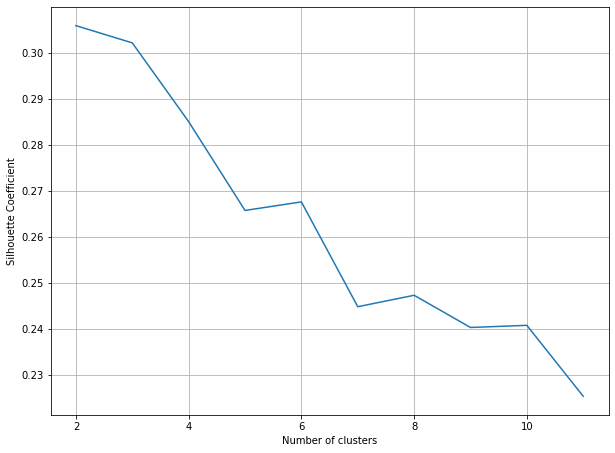

In [67]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [69]:
# from silhoute Coeffiencient it is giving K = 6 as a best cluster lets check on ELbow analysis too

In [70]:
# elbow analysis

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [71]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,10183.806876
1,3,7821.932160
2,4,6544.046471
3,5,5794.850078
4,6,5171.367326
5,7,4833.515778
6,8,4570.392965
7,9,4251.786208
8,10,4047.035373
9,11,3884.512460


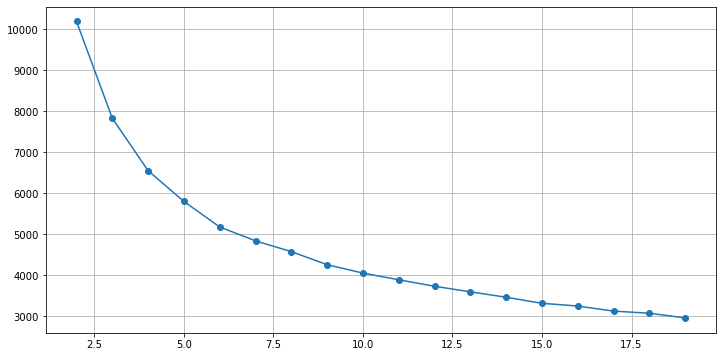

In [72]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [76]:
telco_num.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,cardmon,wiremon,ebill,custcat,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,2,13,44,1,9,64,4,5,0,0,...,7.50,0.0,0,1,1,0,1,0,6,2
1,3,11,33,1,7,136,5,5,0,0,...,15.25,35.7,0,4,0,3,3,4,4,6
2,3,68,52,1,24,116,1,29,0,1,...,30.25,0.0,0,3,0,3,3,4,4,6
3,2,33,33,0,12,33,2,0,0,1,...,0.00,0.0,0,1,1,0,1,0,6,2
4,2,23,30,1,9,30,1,2,0,0,...,0.00,0.0,0,3,1,0,1,0,6,2


In [ ]:
# profiling

In [83]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [85]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])

In [86]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,297.000,482.000,221.000,323.000,212.000,197.000,268.000,165.000,216.000,...,159.000,193.000,146.000,93.000,178.000,102.000,69.000,125.000,181.000,106.000
Seg_Pct,1.0,0.297,0.482,0.221,0.323,0.212,0.197,0.268,0.165,0.216,...,0.159,0.193,0.146,0.093,0.178,0.102,0.069,0.125,0.181,0.106


In [90]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [91]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
region,2.0220,2.026936,2.033195,1.990950,2.030960,1.985849,2.015228,2.044776,2.000000,1.981481,...,2.006289,2.025907,2.020548,2.086022,2.033708,2.058824,1.942029,2.0480,1.988950,1.990566
tenure,35.5260,42.892256,31.516598,34.371041,20.266254,34.179245,55.969543,39.955224,57.600000,22.083333,...,56.566038,21.238342,56.335616,59.172043,22.157303,44.205882,50.434783,17.6800,31.668508,18.141509
age,41.6840,46.360269,39.595436,39.954751,35.681115,39.693396,48.294416,45.634328,49.472727,36.245370,...,49.113208,35.906736,49.301370,53.741935,36.460674,45.098039,42.985507,35.4960,41.613260,32.669811
marital,0.4950,0.515152,0.475104,0.511312,0.421053,0.514151,0.558376,0.522388,0.545455,0.458333,...,0.540881,0.455959,0.527397,0.580645,0.460674,0.500000,0.623188,0.3840,0.502762,0.462264
address,11.5510,14.855219,10.182573,10.095023,7.126935,10.066038,17.441624,13.727612,18.503030,7.449074,...,18.188679,7.362694,18.527397,18.580645,7.567416,13.901961,11.913043,6.7360,11.237569,6.179245
income,77.5350,106.609428,55.616183,86.266968,48.102167,84.589623,81.304569,104.656716,86.163636,47.199074,...,77.666667,46.512953,81.671233,203.387097,46.842697,106.637255,68.942029,51.6720,60.563536,50.028302
ed,2.6710,2.212121,2.595436,3.452489,2.727554,3.471698,2.370558,2.190299,2.242424,2.268519,...,2.194969,2.326425,2.130137,2.419355,2.247191,3.529412,3.304348,3.2800,2.116022,3.339623
employ,10.9870,15.531987,8.877593,9.479638,6.136223,9.235849,15.243655,15.089552,16.212121,6.694444,...,15.654088,6.466321,15.945205,24.043011,6.702247,12.323529,10.072464,5.8800,11.254144,4.773585
retire,0.0470,0.080808,0.033195,0.031674,0.018576,0.023585,0.086294,0.070896,0.103030,0.023148,...,0.100629,0.025907,0.102740,0.129032,0.028090,0.029412,0.014493,0.0080,0.049724,0.009434
gender,0.5170,0.511785,0.524896,0.506787,0.517028,0.500000,0.532995,0.518657,0.527273,0.532407,...,0.503145,0.538860,0.500000,0.516129,0.539326,0.519608,0.565217,0.4880,0.513812,0.509434


In [92]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [93]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0000,297.000000,482.000000,221.000000,323.000000,212.000000,197.000000,268.000000,165.000000,216.000000,...,159.000000,193.000000,146.000000,93.000000,178.000000,102.000000,69.000000,125.0000,181.000000,106.000000
Seg_Pct,1.0000,0.297000,0.482000,0.221000,0.323000,0.212000,0.197000,0.268000,0.165000,0.216000,...,0.159000,0.193000,0.146000,0.093000,0.178000,0.102000,0.069000,0.1250,0.181000,0.106000
region,2.0220,2.026936,2.033195,1.990950,2.030960,1.985849,2.015228,2.044776,2.000000,1.981481,...,2.006289,2.025907,2.020548,2.086022,2.033708,2.058824,1.942029,2.0480,1.988950,1.990566
tenure,35.5260,42.892256,31.516598,34.371041,20.266254,34.179245,55.969543,39.955224,57.600000,22.083333,...,56.566038,21.238342,56.335616,59.172043,22.157303,44.205882,50.434783,17.6800,31.668508,18.141509
age,41.6840,46.360269,39.595436,39.954751,35.681115,39.693396,48.294416,45.634328,49.472727,36.245370,...,49.113208,35.906736,49.301370,53.741935,36.460674,45.098039,42.985507,35.4960,41.613260,32.669811
marital,0.4950,0.515152,0.475104,0.511312,0.421053,0.514151,0.558376,0.522388,0.545455,0.458333,...,0.540881,0.455959,0.527397,0.580645,0.460674,0.500000,0.623188,0.3840,0.502762,0.462264
address,11.5510,14.855219,10.182573,10.095023,7.126935,10.066038,17.441624,13.727612,18.503030,7.449074,...,18.188679,7.362694,18.527397,18.580645,7.567416,13.901961,11.913043,6.7360,11.237569,6.179245
income,77.5350,106.609428,55.616183,86.266968,48.102167,84.589623,81.304569,104.656716,86.163636,47.199074,...,77.666667,46.512953,81.671233,203.387097,46.842697,106.637255,68.942029,51.6720,60.563536,50.028302
ed,2.6710,2.212121,2.595436,3.452489,2.727554,3.471698,2.370558,2.190299,2.242424,2.268519,...,2.194969,2.326425,2.130137,2.419355,2.247191,3.529412,3.304348,3.2800,2.116022,3.339623
employ,10.9870,15.531987,8.877593,9.479638,6.136223,9.235849,15.243655,15.089552,16.212121,6.694444,...,15.654088,6.466321,15.945205,24.043011,6.702247,12.323529,10.072464,5.8800,11.254144,4.773585


In [94]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [96]:
Profling_output_final.to_csv('C:/Users/tejan/Desktop//Profiling_output_new.csv')